# DataFrame - Haladó

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Felhasznált adat: https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases
covid = pd.read_csv('covid.csv')
covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,40,40,74,84,94,110,110,120,170,174
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,201,230,264,302,367,409,454,511,584,716
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,0,0,0,0,0,0,4,4,5,5
252,NaN,MS Zaandam,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,2
253,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


Feladat: Össze szeretnénk gyűjteni az eseteket, kirajzolni dátum szerint, összesítő statisztikát adni országonként.<br>
Probléma: A dátumok az oszlopokban szerepelnek, amikre oszlop szerint végig iterálva egy ciklusban lehetne összeadni egy sor tartalmát. Nehéz ábrázolni és kezelni.<br>
Megoldás: pandas melt, transzformál egy széles adattáblát hosszú formátumúvá. Ehhez használjuk az <br>

- id_vars: oszlop listát amik a kulcsok lesznek a műveletben
- var_name: új oszlop neve, amibe a többi oszlopnév kerül majd
- value_name: új oszlop, amibe a kulcshoz és var_name-hez tartozó értékek íródnak

A melt inverze a pivot.

In [62]:
covid_melted = covid.melt(id_vars = ['Country/Region','Province/State','Lat','Long'],
                          var_name = 'date',
                          value_name = 'cases')

In [8]:
covid_melted

,Country/Region,Province/State,Lat,Long,date,cases
0,Afghanistan,NaN,33.000000,65.000000,1/22/20,0
1,Albania,NaN,41.153300,20.168300,1/22/20,0
2,Algeria,NaN,28.033900,1.659600,1/22/20,0
3,Andorra,NaN,42.506300,1.521800,1/22/20,0
4,Angola,NaN,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
17915,United Kingdom,Turks and Caicos Islands,21.694000,-71.797900,3/31/20,5
17916,MS Zaandam,NaN,0.000000,0.000000,3/31/20,2
17917,Botswana,NaN,-22.328500,24.684900,3/31/20,4
17918,Burundi,NaN,-3.373100,29.918900,3/31/20,2


In [63]:
# Törlünk felesleges oszlopokat
covid_melted = covid_melted[['Country/Region','date','cases']]
covid_melted

,Country/Region,date,cases
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
17915,United Kingdom,3/31/20,5
17916,MS Zaandam,3/31/20,2
17917,Botswana,3/31/20,4
17918,Burundi,3/31/20,2


Nézzük meg az egy országhoz tartozó esetszámot, ehhez egy groupby-t fogunk használni. A groupby vár egy oszlop listát, ezek lesznek a kulcsok. Ez egy aggregált objektumot hoz létre, amin érdemes egy aggregáló függvényt alkalmaznunk (sum, mean, min, max, cumsum, diff, etc.).

In [10]:
covid_melted.groupby(['Country/Region'])

In [22]:
covid_grouped = covid_melted.groupby(['Country/Region']).max()
covid_grouped

,date,cases
Country/Region,,
Afghanistan,3/9/20,174
Albania,3/9/20,243
Algeria,3/9/20,716
Andorra,3/9/20,376
Angola,3/9/20,7
...,...,...
Venezuela,3/9/20,135
Vietnam,3/9/20,212
West Bank and Gaza,3/9/20,119


Keressük meg az 5 jelenleg legtöbb esetet jelentő országot. Függvény: sort_values

- by: oszloplista, ami szerint rendezünk
- ascending: növekvő vagy csökkenő (True/False)

In [12]:
covid_grouped.sort_values(by = ['cases'], ascending = False)

,cases
Country/Region,
China,4186795
Italy,1211089
US,1086968
Spain,742697
Germany,588758
...,...
Timor-Leste,10
MS Zaandam,8
Botswana,7


iloc első paraméterként a sorokat, második helyen az oszlopokat szűrhetjük.

In [13]:
covid_grouped.sort_values(by = ['cases'], ascending = False).iloc[0:5]

,cases
Country/Region,
China,4186795
Italy,1211089
US,1086968
Spain,742697
Germany,588758


In [14]:
# : slice
covid.iloc[:,1]

0         Afghanistan
1             Albania
2             Algeria
3             Andorra
4              Angola
            ...      
251    United Kingdom
252        MS Zaandam
253          Botswana
254           Burundi
255      Sierra Leone
Name: Country/Region, Length: 256, dtype: object

In [15]:
# and dice
covid.iloc[0:3,0:5]

,Province/State,Country/Region,Lat,Long,1/22/20
0,NaN,Afghanistan,33.0000,65.0000,0
1,NaN,Albania,41.1533,20.1683,0
2,NaN,Algeria,28.0339,1.6596,0


In [16]:
covid.iloc[:,[1]]

,Country/Region
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
...,...
251,United Kingdom
252,MS Zaandam
253,Botswana
254,Burundi


In [17]:
top20 = covid_grouped.sort_values(by = ['cases'], ascending = False).iloc[0:20]
top20

,cases
Country/Region,
China,4186795
Italy,1211089
US,1086968
Spain,742697
Germany,588758
Iran,527564
France,410812
"Korea, South",257082
United Kingdom,165741


In [18]:
# Probléma: A Country/Region nem oszlop, nem tudunk rá így hivatkozni a group by után. Vissza kell állítanunk oszloppá.
plt.bar(top20['Country/Region'],top20['cases'])

KeyError: 'Country/Region'

## Indexek
Egy pandas dataframe indexei bármilyen értéket felvehetnek, alapértelmezetten az egészek 0-tól, de lehet az index tetszőleges különböző kulcsot definiáló oszlop-lista, ezen az egyértelmű kulcson keresztül tudunk egy rekord dictionary-re a táblában hivatkozni.

In [19]:
top20 = top20.reset_index()
top20

,Country/Region,cases
0,China,4186795
1,Italy,1211089
2,US,1086968
3,Spain,742697
4,Germany,588758
5,Iran,527564
6,France,410812
7,"Korea, South",257082
8,United Kingdom,165741
9,Switzerland,155137


<BarContainer object of 20 artists>

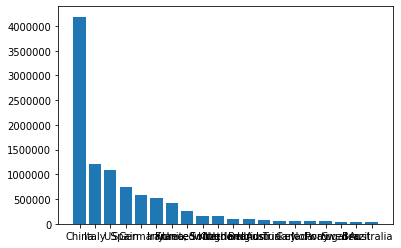

In [64]:
plt.bar(top20['Country/Region'],top20['cases'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

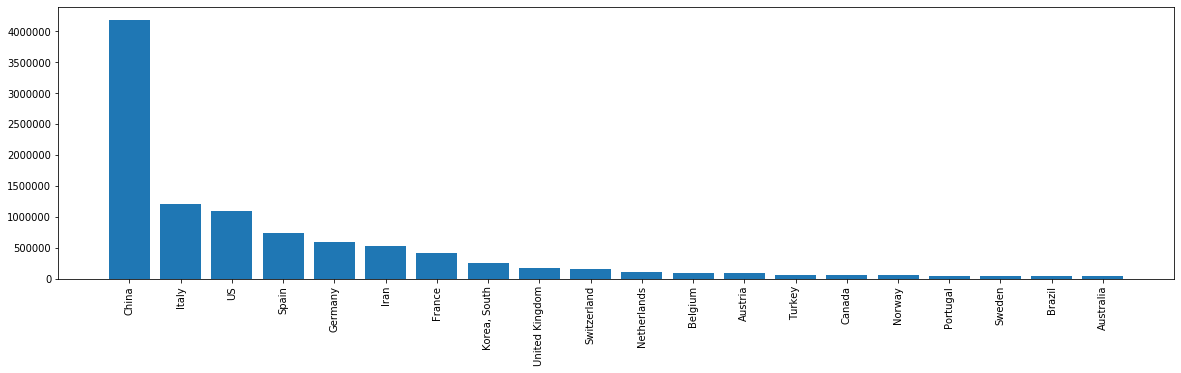

In [75]:
plt.figure(figsize=(20,5))
plt.bar(top20['Country/Region'],top20['cases'])
plt.xticks(rotation=90)

Térjünk vissza a hosszú covid_melted táblához.
Kiválasztunk belőle 3 országot és ezeket fogjuk használni ábrázolni az idő függvényében.

In [197]:
covid_slist = covid_melted[covid_melted['Country/Region'].isin(['China', 'Italy', 'US'])]
covid_slist

,Country/Region,date,cases
49,China,1/22/20,1
50,China,1/22/20,14
51,China,1/22/20,6
52,China,1/22/20,1
53,China,1/22/20,0
...,...,...,...
17743,China,3/31/20,76
17744,China,3/31/20,182
17745,China,3/31/20,1257
17801,Italy,3/31/20,105792


In [160]:
# ezt még mindig groupolnunk kell, mert Kína a különböző régiónként külön reportál.
covid_slist.groupby(['Country/Region','date']).sum()

cases
Country/Region date          
China          1/22/20    548
               1/23/20    643
               1/24/20    920
               1/25/20   1406
               1/26/20   2075
...                       ...
US             3/5/20     217
               3/6/20     262
               3/7/20     402
               3/8/20     518
               3/9/20     583

[210 rows x 1 columns]

In [198]:
# Flattening
covid_slist = covid_slist.groupby(['Country/Region','date']).sum().reset_index()
covid_slist

,Country/Region,date,cases
0,China,1/22/20,548
1,China,1/23/20,643
2,China,1/24/20,920
3,China,1/25/20,1406
4,China,1/26/20,2075
...,...,...,...
205,US,3/5/20,217
206,US,3/6/20,262
207,US,3/7/20,402
208,US,3/8/20,518


A grafikonhoz használjunk seaborn-t, hiszen az ország egyértelmű azonosító ami szerint tudunk csoportosítani. Probléma lesz a date-ekkel hiszen a seaborn rosszul rendezi az alfabetikus listát, ezt meg lehetne oldani datetime-al.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]), <a list of 70 Text xticklabel objects>)

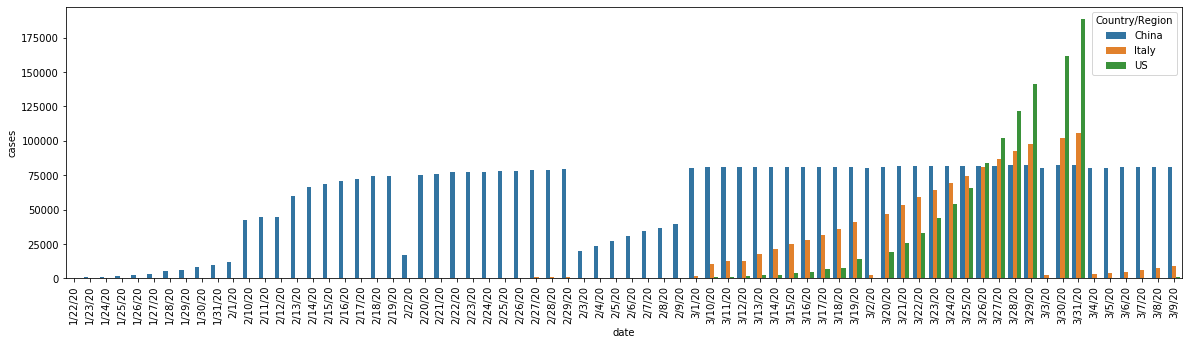

In [94]:
plt.figure(figsize=(20,5))
sns.barplot(data = covid_slist, x = 'date', y = 'cases', hue = 'Country/Region')
plt.xticks(rotation=90)

In [102]:
# Reading https://www.w3schools.com/python/python_datetime.asp
import datetime

In [103]:
datetime.datetime.strptime('3/9/20','%m/%d/%y')

datetime.datetime(2020, 3, 9, 0, 0)

In [116]:
# btw a to_datetime is teljesen jól működik
pd.to_datetime(covid_slist['date'])

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
205   2020-03-05
206   2020-03-06
207   2020-03-07
208   2020-03-08
209   2020-03-09
Name: date, Length: 210, dtype: datetime64[ns]

In [199]:
# ami nem szép, hogy a seaborn megint ki proóbálja találni mit szeretnénk
covid_slist['date'] = pd.to_datetime(covid_slist['date'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]), <a list of 70 Text xticklabel objects>)

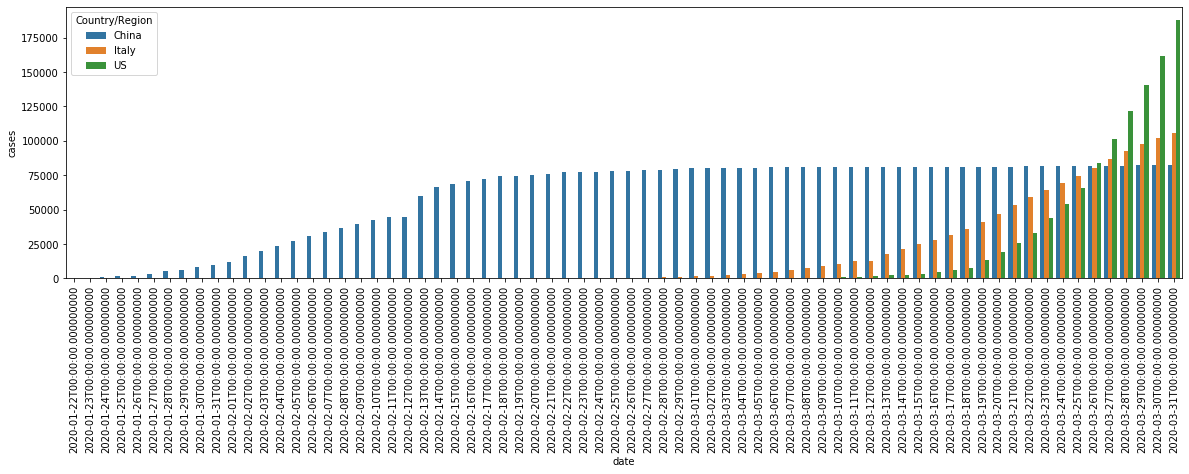

In [200]:
plt.figure(figsize=(20,5))
sns.barplot(data = covid_slist, x = 'date', y = 'cases', hue = 'Country/Region')
plt.xticks(rotation=90)

In [164]:
covid_slist['date'].dt.strftime('%m%d')

0      0122
1      0123
2      0124
3      0125
4      0126
       ... 
205    0305
206    0306
207    0307
208    0308
209    0309
Name: date, Length: 210, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]), <a list of 70 Text xticklabel objects>)

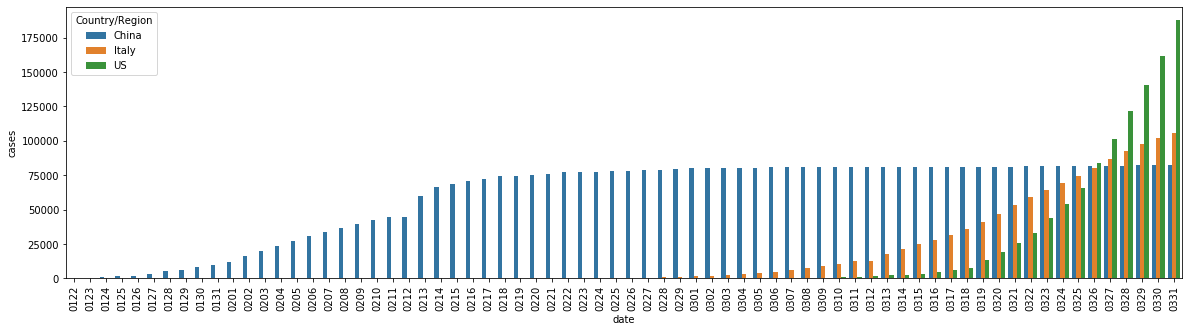

In [201]:
# strftime-al (string from time) tudunk visszaalakítani
# covid_slist['date'] = pd.to_datetime(covid_slist['date'])
covid_slist['date'] = covid_slist['date'].dt.strftime('%m%d')
plt.figure(figsize=(20,5))
sns.barplot(data = covid_slist, x = 'date', y = 'cases', hue = 'Country/Region')
plt.xticks(rotation=90)

Ábrázoljuk a napi megbetegedésket:

In [192]:
covid_inc = covid_slist.sort_values(['Country/Region','date'])
covid_inc['diff_cases'] = covid_inc.groupby(['Country/Region']).diff()
covid_inc

,Country/Region,date,cases,diff_cases
0,China,0122,548,NaN
1,China,0123,643,95.0
2,China,0124,920,277.0
3,China,0125,1406,486.0
4,China,0126,2075,669.0
...,...,...,...,...
198,US,0327,101657,17821.0
199,US,0328,121478,19821.0
200,US,0329,140886,19408.0
202,US,0330,161807,20921.0


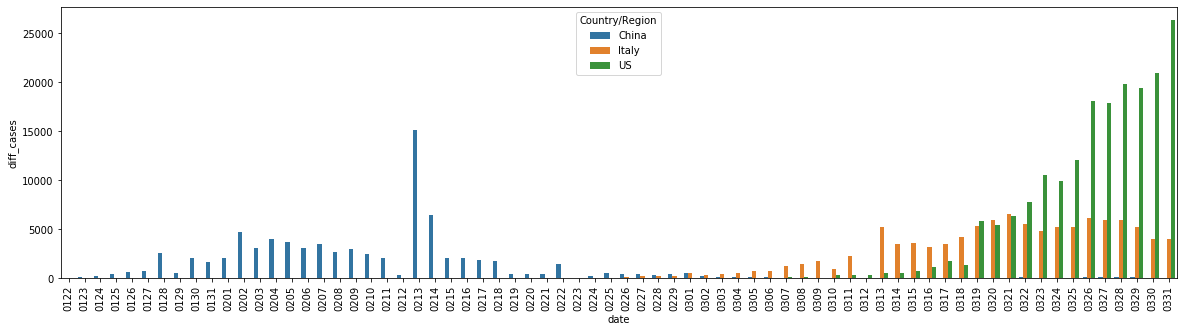

In [204]:
plt.figure(figsize=(20,5))
sns.barplot(data = covid_inc, x = 'date', y = 'diff_cases', hue = 'Country/Region')
plt.xticks(rotation=90);

In [21]:
recovered = pd.read_csv('recovered.csv')
recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.00000,65.000000,0,0,0,0,0,0,...,2,2,5,5,10,10,10,15,18,18
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,33,44,52,67,76,89,99,104,116,131
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,31,37,46,61,61,62,90,90,90,113
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1,10,10,10,10,16,21,26,31,39
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,1,1,1,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245,Saint Pierre and Miquelon,France,46.88520,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,NaN,South Sudan,6.87700,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,NaN,Western Sahara,24.21550,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
recovered_melted = recovered.melt(id_vars = ['Country/Region','Province/State','Lat','Long'],
                          var_name = 'date',
                          value_name = 'cases')

In [61]:
recovered_melted = recovered_melted[['Country/Region','date','cases']]
recovered_melted

,Country/Region,date,cases
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
19168,United Kingdom,4/7/20,0
19169,France,4/7/20,0
19170,South Sudan,4/7/20,0
19171,Western Sahara,4/7/20,0


In [31]:
recovered_melted.iloc[0:5]

,Country/Region,date,cases
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


# Join
A pandas rengeteg megoldást biztosít táblák összefűzésére. Ezeknek a használatából veszünk néhány példát.

-concat: egyszerű konkatenációja táblák egy listájának
-

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [30]:
pd.concat([recovered_melted.iloc[0:5],recovered_melted.iloc[5:8]])

,Country/Region,date,cases
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
5,Antigua and Barbuda,1/22/20,0
6,Argentina,1/22/20,0
7,Armenia,1/22/20,0


In [32]:
# működik, de vegyük észre az indexek közti ugrást, ezt a reset_index-el oldhatjuk fel
pd.concat([recovered_melted.iloc[0:5],recovered_melted.iloc[20:25]])

,Country/Region,date,cases
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
20,Bangladesh,1/22/20,0
21,Barbados,1/22/20,0
22,Belarus,1/22/20,0
23,Belgium,1/22/20,0
24,Belize,1/22/20,0


In [36]:
pd.concat([recovered_melted.iloc[0:5],recovered_melted.iloc[20:25],recovered_melted.iloc[50:51]]).reset_index()

,index,Country/Region,date,cases
0,0,Afghanistan,1/22/20,0
1,1,Albania,1/22/20,0
2,2,Algeria,1/22/20,0
3,3,Andorra,1/22/20,0
4,4,Angola,1/22/20,0
5,20,Bangladesh,1/22/20,0
6,21,Barbados,1/22/20,0
7,22,Belarus,1/22/20,0
8,23,Belgium,1/22/20,0
9,24,Belize,1/22/20,0


In [64]:
pd.merge(covid_melted, recovered_melted, on = ['Country/Region', 'date'])

,Country/Region,date,cases_x,cases_y
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
111295,Burma,3/31/20,15,0
111296,MS Zaandam,3/31/20,2,0
111297,Botswana,3/31/20,4,0
111298,Burundi,3/31/20,2,0


In [66]:
recovered_melted = recovered_melted.rename(columns = {'cases': 'recovered'})
recovered_melted

,Country/Region,date,recovered
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
19168,United Kingdom,4/7/20,0
19169,France,4/7/20,0
19170,South Sudan,4/7/20,0
19171,Western Sahara,4/7/20,0


In [67]:
pd.merge(covid_melted, recovered_melted, on = ['Country/Region', 'date'])

,Country/Region,date,cases,recovered
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
111295,Burma,3/31/20,15,0
111296,MS Zaandam,3/31/20,2,0
111297,Botswana,3/31/20,4,0
111298,Burundi,3/31/20,2,0


In [93]:
cases_3 = covid_melted[(covid_melted['Country/Region'].isin(['Turkey','Germany','Italy'])) & (covid_melted['date'] == '3/31/20')]
recovered_3 = recovered_melted[(recovered_melted['Country/Region'].isin(['Germany','Spain','Italy'])) & (recovered_melted['date'] == '3/31/20')]

In [84]:
cases_3

,Country/Region,date,cases
17784,Germany,3/31/20,71808
17801,Italy,3/31/20,105792
17877,Turkey,3/31/20,13531


In [85]:
recovered_3

,Country/Region,date,recovered
17293,Germany,3/31/20,16100
17312,Italy,3/31/20,15729
17380,Spain,3/31/20,19259


In [100]:
# Alapból inner join, a kulcsokat on-al tudjuk megadni, gyakran alapertelmezetten is működik
pd.merge(cases_3,recovered_3)

,Country/Region,date,cases,recovered
0,Germany,3/31/20,71808,16100
1,Italy,3/31/20,105792,15729


In [101]:
# Inner join
pd.merge(cases_3,recovered_3, how='inner', on=['Country/Region','date'] )

,Country/Region,date,cases,recovered
0,Germany,3/31/20,71808,16100
1,Italy,3/31/20,105792,15729


In [102]:
# Outer join
pd.merge(cases_3,recovered_3, how='outer', on=['Country/Region','date'] )

,Country/Region,date,cases,recovered
0,Germany,3/31/20,71808.0,16100.0
1,Italy,3/31/20,105792.0,15729.0
2,Turkey,3/31/20,13531.0,NaN
3,Spain,3/31/20,NaN,19259.0


In [103]:
# Filling NaN with 0
pd.merge(cases_3,recovered_3, how='outer', on=['Country/Region','date'] ).fillna(0)

,Country/Region,date,cases,recovered
0,Germany,3/31/20,71808.0,16100.0
1,Italy,3/31/20,105792.0,15729.0
2,Turkey,3/31/20,13531.0,0.0
3,Spain,3/31/20,0.0,19259.0


In [104]:
pd.merge(cases_3,recovered_3, how='left', on=['Country/Region','date'] )

,Country/Region,date,cases,recovered
0,Germany,3/31/20,71808,16100.0
1,Italy,3/31/20,105792,15729.0
2,Turkey,3/31/20,13531,NaN


In [105]:
pd.merge(cases_3,recovered_3, how='right', on=['Country/Region','date'] )

,Country/Region,date,cases,recovered
0,Germany,3/31/20,71808.0,16100
1,Italy,3/31/20,105792.0,15729
2,Spain,3/31/20,NaN,19259
